In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Data Preprocessing</h3>

In [4]:
df["Symptoms"] = ""

In [5]:
for i in range(df.shape[0]):
    values = df.iloc[i].values
    values = values.tolist()
    if 0 in values:
        df["Symptoms"][i] = values[1:values.index(0)]
    else:
        df["Symptoms"][i] = values[1:]

In [6]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Symptoms
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, ..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[ skin_rash, nodal_skin_eruptions, dischromi..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, nodal_skin_eruptions, dischromic _..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, dischromic _patches, na..."
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[itching, skin_rash, nodal_skin_eruptions, n..."


In [7]:
df["Symptoms"].head()

0    [itching,  skin_rash,  nodal_skin_eruptions,  ...
1    [ skin_rash,  nodal_skin_eruptions,  dischromi...
2    [itching,  nodal_skin_eruptions,  dischromic _...
3    [itching,  skin_rash,  dischromic _patches, na...
4    [itching,  skin_rash,  nodal_skin_eruptions, n...
Name: Symptoms, dtype: object

<h3>Data Engineering</h3>

Getting all symptoms value

In [8]:
# data = df.iloc[:,1:].values.ravel().tolist()

In [9]:
all_symptoms = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].values.ravel()

In [10]:
symptoms = pd.unique(all_symptoms)
symptoms = symptoms.tolist()
symptoms = [i for i in symptoms if str(i) != "nan"]

In [11]:
final_df = pd.DataFrame(columns = symptoms,index = df.index)

In [12]:
final_df["Symptoms"] = df["Symptoms"]

In [13]:
for i in symptoms:
    final_df[i] = final_df.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

In [14]:
final_df["Disease"] = df["Disease"]
final_df = final_df.drop("Symptoms",axis=1)

In [15]:
final_df

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Disease
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


<h4>Total Number of Disease</h4>

In [16]:
len(final_df["Disease"].unique())

41

<h4>Total Number of Symptoms</h4>

In [17]:
len(symptoms)

131

In [18]:
final_df["Disease"].unique()


array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [19]:
final_df.shape

(4920, 132)

<h3>Data Modeling</h3>

In [20]:
def confusion_plot(model, X_test, y_test):
    plt.figure(figsize=(10, 10), dpi=150)
    
    y_pred = model.predict(X_test)
    con_me = confusion_matrix(y_test, y_pred)
    sns.heatmap(con_me, annot=True)

In [21]:
train, test = train_test_split(final_df,test_size=0.2)
X_train = train.drop("Disease",axis=1)
y_train = train["Disease"].copy()
X_test = test.drop("Disease",axis=1)
y_test = test["Disease"].copy()

In [22]:
X_test

,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,continuous_sneezing,shivering,chills,watering_from_eyes,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
1020,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3553,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
triee = X_test.loc[X_test.index[0]]

In [24]:
type(triee)

pandas.core.series.Series

<h3>Using Gradient Boosting Classifier</h3>

In [25]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

<h4>Evaluation Metrics</h4>

In [26]:
#Accuracy
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

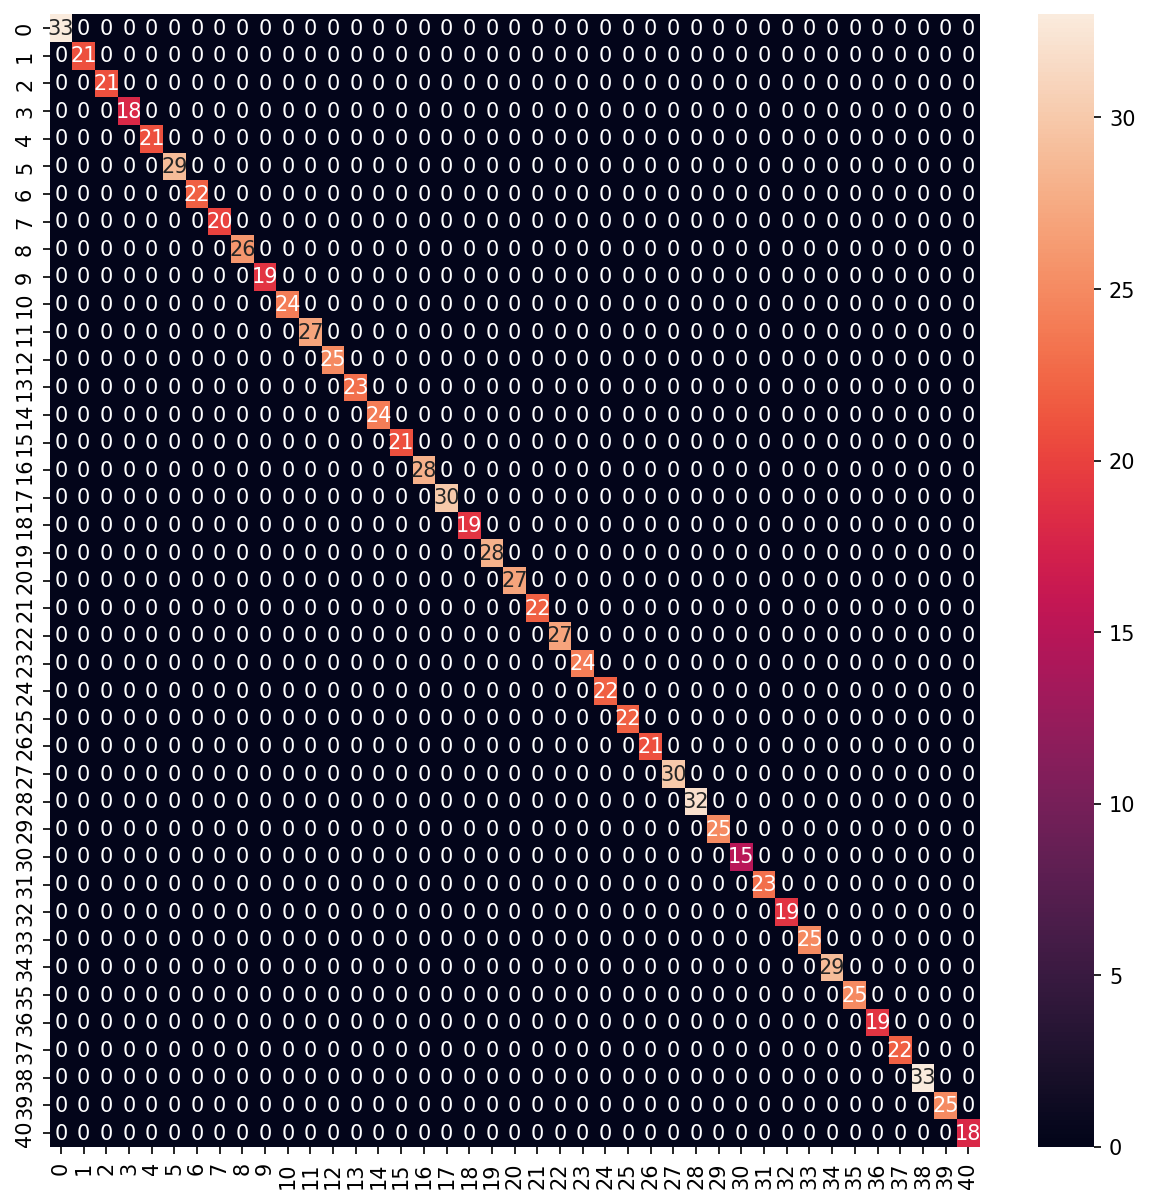

In [27]:
#Confusion Matrix
confusion_plot(clf, X_test, y_test)

<h3>Using Random Forest Classifier</h3>

In [28]:
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)

RandomForestClassifier()

<h4>Evaluation Metrics</h4>

In [29]:
#Accuracy
y_pred = rnd_forest.predict(X_test)
acc = accuracy_score(y_test,y_pred)

In [30]:
acc * 100

100.0

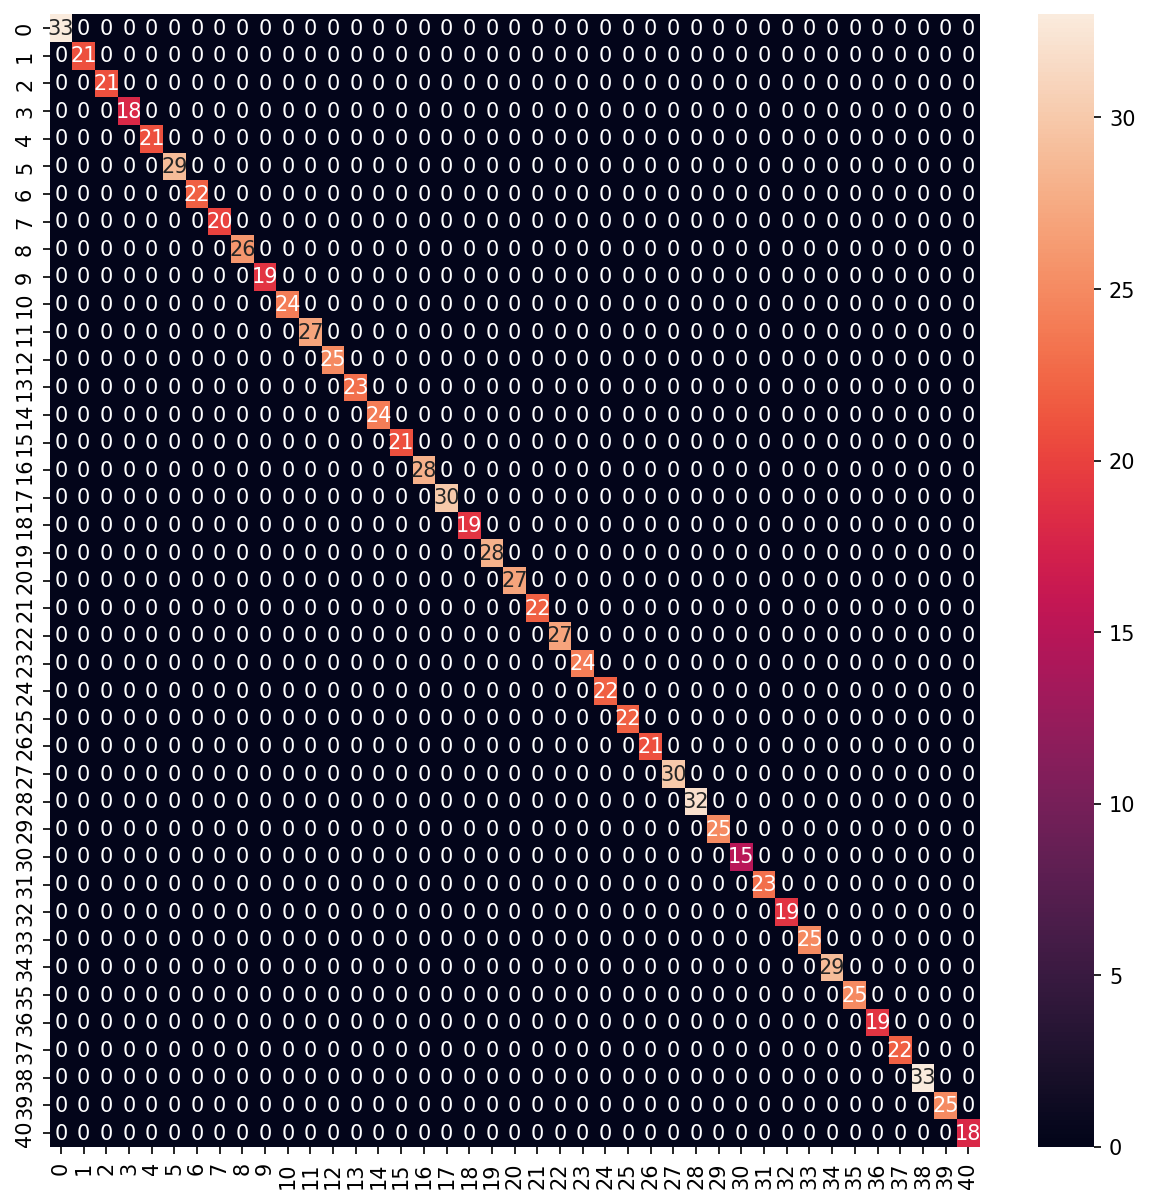

In [31]:
#Confusion Matrix
confusion_plot(rnd_forest, X_test, y_test)

In [32]:
X_test = X_test.values

In [33]:
X_test[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [34]:
X_train.iloc[0]

itching                  0
 skin_rash               0
 nodal_skin_eruptions    0
 dischromic _patches     0
 continuous_sneezing     0
                        ..
 small_dents_in_nails    0
 inflammatory_nails      0
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
Name: 896, Length: 131, dtype: int64

In [35]:
prediction = rnd_forest.predict([X_test[1]])

In [36]:
print(prediction)

['Pneumonia']


In [37]:
sample_data = np.array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
sample_data

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
rnd_forest.predict([sample_data])

array(['Common Cold'], dtype=object)

<h3>Exporting the Random Forest Model</h3>

In [40]:
import joblib

In [41]:
joblib.dump(rnd_forest, 'model.pkl')

['model.pkl']

In [42]:
clf = joblib.load('model.pkl')

predictions = clf.predict([sample_data])
print(predictions)

['Common Cold']


In [43]:
sample_data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
predictions = clf.predict([sample_data])
print(predictions)

['Tuberculosis']


<h3>Disease Description and Precautions</h3>

In [45]:
df_precaution = pd.read_csv("symptom_precaution.csv")
df_description = pd.read_csv("symptom_Description.csv")

In [46]:
df_precaution.fillna('consult doctor')
df_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [47]:
df_precaution['Precautions'] = df_precaution[df_precaution.columns[1:]].apply(lambda x: ', '.join(x.dropna().astype(str)),axis=1)

In [48]:
df_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4,Precautions
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up,"stop irritation, consult nearest hospital, sto..."
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out,"Consult nearest hospital, avoid oily food, avo..."
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching,"apply calamine, cover area with bandage, use i..."
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep,"reduce stress, exercise, eat healthy, get prop..."
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths,"wash hands with warm soapy water, stop bleedin..."


In [49]:
df_precaution['Disease'] = df_precaution['Disease'].str.strip()

In [50]:
df_precaution['Precautions'] = df_precaution['Precautions'].str.strip()

In [51]:
df_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4,Precautions
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up,"stop irritation, consult nearest hospital, sto..."
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out,"Consult nearest hospital, avoid oily food, avo..."
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching,"apply calamine, cover area with bandage, use i..."
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep,"reduce stress, exercise, eat healthy, get prop..."
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths,"wash hands with warm soapy water, stop bleedin..."


In [52]:
df_precaution = df_precaution.drop(columns=['Precaution_1', 'Precaution_2','Precaution_3', 'Precaution_4'])
df_precaution.head()

,Disease,Precautions
0,Drug Reaction,"stop irritation, consult nearest hospital, sto..."
1,Malaria,"Consult nearest hospital, avoid oily food, avo..."
2,Allergy,"apply calamine, cover area with bandage, use i..."
3,Hypothyroidism,"reduce stress, exercise, eat healthy, get prop..."
4,Psoriasis,"wash hands with warm soapy water, stop bleedin..."


In [53]:
df_desc_prec = pd.merge(df_precaution, df_description, on='Disease', how='outer')
df_desc_prec.head()

,Disease,Precautions,Description
0,Drug Reaction,"stop irritation, consult nearest hospital, sto...",An adverse drug reaction (ADR) is an injury ca...
1,Malaria,"Consult nearest hospital, avoid oily food, avo...",An infectious disease caused by protozoan para...
2,Allergy,"apply calamine, cover area with bandage, use i...",An allergy is an immune system response to a f...
3,Hypothyroidism,"reduce stress, exercise, eat healthy, get prop...","Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,"wash hands with warm soapy water, stop bleedin...",Psoriasis is a common skin disorder that forms...


In [54]:
df_desc_prec.to_csv('precautions_description.csv', index=False)